---

## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로서 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 어떠한 날씨요소가 따릉이 수요와 관련 있는지 분석하여 인사이트를 도출해봅시다

---

## ▣ 데이터 소개
[기본 데이터]
* 데이터 : sbikedata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

---

### [Step1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [50]:
#EDA에 사용할 라이브러리를 import 하세요
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [163]:
#이번 프로젝트에서 분석할 데이터를 불러오세요
data = pd.read_csv('sbikedata.csv')

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5827 non-null   float64
 3   PM2.5          5827 non-null   float64
 4   ozone          5827 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 500.9+ KB


### [Step2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 등의 변수를 포함하여, 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

- 가설 1 : 

    ㅇ 귀무가설: 강우 여부와 따릉이간에는 연관성이 없다. <br>
    ㅇ 대립가설 : 강우 여부와 따릉이 대여량 간에는 연관성이 있다.

- 가설 2 :

    ㅇ 귀무가설: 온도에 따라 따릉이 대여량 간에는 연관성이 없다 <br>
    ㅇ 대립가설 : 온도에 따라 따릉이 대여량 간에는 연관성이 있다.

- 가설 3 :
    
    ㅇ 귀무가설: 시간에 따른 따릉이 대여량 간에는 연관성이 없다. <br> 
    ㅇ 대립가설 : 시간에 따른 따릉이 대여량 간에는 연관성이 있다.

- 가설 4 :
    
    ㅇ 귀무가설: 미세먼지 따라 따릉이 대여량 간에는 연관성이 없다 <br>
    ㅇ 대립가설 : 미세먼지 따라 따릉이 대여량 간에는 연관성이 있다.

### [Step3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

### Feature1 : hour

1. 변수가 내포하고 있는 의미

- 변수의 의미를 한번 짚고 넘어갑시다.
hour 변수는 어떤 의미를 가지고 있나요?

    시간

2. 변수가 수치형인지 범주형인지


In [5]:
#변수의 자료형을 확인해보세요.
data['hour'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: hour
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


## hour : 정수형

3. 변수의 결측치 존재 여부 및 조치방안

In [8]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
print(data['hour'].isna().sum())
print(data['hour'].unique())

0
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  0]


## hour : 결측치 없음

4. 변수의 기초 통계량 확인

In [9]:
#변수의 기초 통계량을 확인해보세요.
data['hour'].describe()

count    5827.000000
mean       11.506607
std         6.921963
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        23.000000
Name: hour, dtype: float64

5. 변수의 분포 확인

In [22]:
#변수의 분포를 확인해보세요.
data['hour'].value_counts().sort_values()

4     241
6     242
2     242
3     242
0     243
5     243
7     243
8     243
9     243
10    243
11    243
12    243
1     243
16    243
17    243
18    243
19    243
20    243
21    243
22    243
23    243
14    243
15    243
13    243
Name: hour, dtype: int64

## 새벽 4시가 가장 적음 -> 241

6. 위 정보로 부터 파악한 내용 정리

In [5]:
#위 정보로부터 파악하신 내용을 정리해보세요.

0 ~ 24값들의 분포, 각자 0시 ~ 24시를 나타냄 또한 4시 6시, 2시, 3시값을 제외한 나머지 값들은 243개 동일

7. 추가 분석사항 도출

In [7]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature2 : temperature

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

    온도

2. 변수가 수치형인지 범주형인지


In [23]:
#변수의 자료형을 확인해보세요.
data['temperature'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: temperature
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


## temperature : 실수

3. 변수의 결측치 존재 여부 및 조치방안

In [24]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['temperature'].isna().sum()

0

## temperature : 결측치 없음

4. 변수의 기초 통계량 확인

In [25]:
#변수의 기초 통계량을 확인해보세요
data['temperature'].describe()

count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64

5. 변수의 분포 확인

In [29]:
#변수의 분포를 확인해보세요.
np.sort(data['temperature'].unique())

array([-3.5, -3.2, -2.7, -2.5, -2.4, -2.3, -2.2, -2. , -1.8, -1.6, -1.3,
       -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6, -0.4, -0.3, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,
        1.4,  1.5,  1.6,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,
        3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,
        4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,
        5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,
        7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,  8. ,
        8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,  9. ,  9.1,
        9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9, 10. , 10.1, 10.2,
       10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. , 11.1, 11.2, 11.3,
       11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1, 12.2, 12.3, 12.4,
       12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13

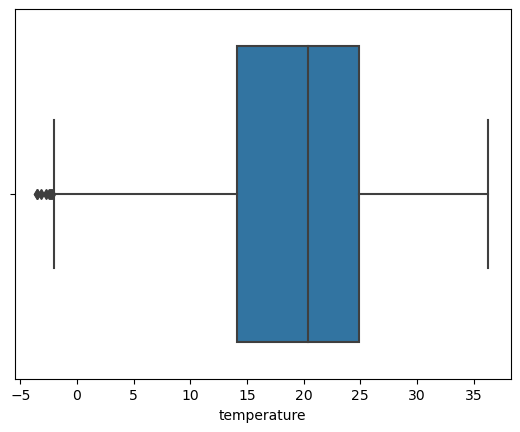

In [289]:
sns.boxplot(x = 'temperature', data = data)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

사계절 데이터가 존재하는것으로 판단

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature3 : precipitation

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

precipitation는 강수량이라는 뜻인데 여기서는 강우여부를 나타냄

2. 변수가 수치형인지 범주형인지


In [30]:
#변수의 자료형을 확인해보세요.
data['precipitation'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: precipitation
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


## precipitation : 정수형 -> 범주

3. 변수의 결측치 존재 여부 및 조치방안

In [31]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['precipitation'].isna().sum()

0

## precipitation : 결측치 없음

4. 변수의 기초 통계량 확인

In [131]:
#변수의 기초 통계량을 확인해보세요
print(data['precipitation'].describe())

count    5827.000000
mean        0.074665
std         0.261582
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: precipitation, dtype: float64


5. 변수의 분포 확인

In [35]:
#변수의 분포를 확인해보세요.
data['precipitation'].value_counts()

0    5387
1     440
Name: precipitation, dtype: int64

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

0은 비가 오지 않음, 1은 비가 왔다는 의미이므로 비가 안온 날이 훨씬 많았음

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature4 : windspeed

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

풍속을 의미할것 같다

2. 변수가 수치형인지 범주형인지


In [36]:
#변수의 자료형을 확인해보세요.
data['windspeed'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: windspeed
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


## windspeed : 실수

3. 변수의 결측치 존재 여부 및 조치방안

In [37]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['windspeed'].isna().sum()

0

## windspeed : 결측치 없음

4. 변수의 기초 통계량 확인

count    5827.000000
mean        2.181444
std         1.083613
min         0.000000
25%         1.500000
50%         2.100000
75%         2.800000
max         8.300000
Name: windspeed, dtype: float64


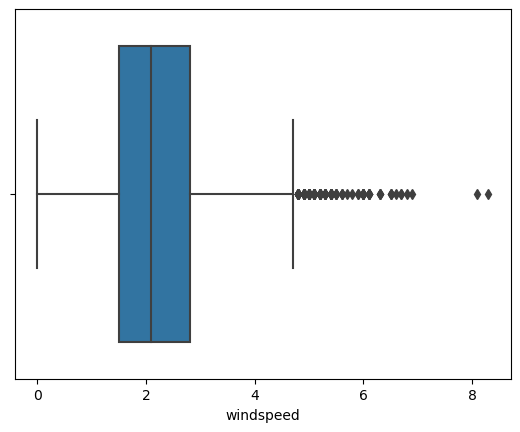

In [119]:
#변수의 기초 통계량을 확인해보세요
print(data['windspeed'].describe())
sns.boxplot(x = 'windspeed', data = data)
plt.show()

5. 변수의 분포 확인

In [39]:
#변수의 분포를 확인해보세요.
data['windspeed'].value_counts()

2.3    255
2.2    246
2.1    242
1.9    239
1.7    235
      ... 
6.9      1
5.8      1
6.8      1
6.4      1
6.2      1
Name: windspeed, Length: 72, dtype: int64

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

풍속은 실수형, 평균값을 의미함

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature5 : humidity

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

습도

2. 변수가 수치형인지 범주형인지


In [40]:
#변수의 자료형을 확인해보세요.
data['humidity'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: humidity
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


## humidity : 정수

3. 변수의 결측치 존재 여부 및 조치방안

In [41]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['humidity'].isna().sum()

0

## humidity : 결측치 없음

4. 변수의 기초 통계량 확인

count    5827.000000
mean       67.103153
std        19.833003
min         0.031811
25%        55.000000
50%        69.000000
75%        82.000000
max       100.000000
Name: humidity, dtype: float64


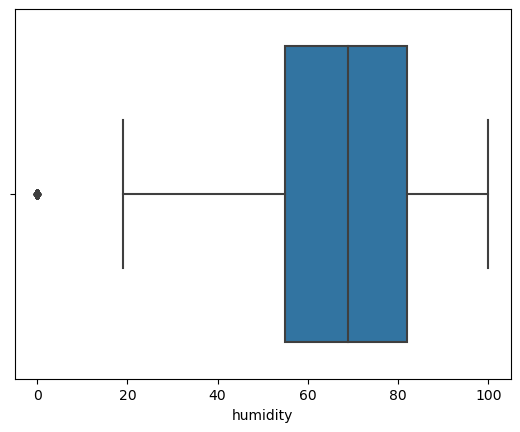

In [118]:
#변수의 기초 통계량을 확인해보세요
print(data['humidity'].describe())
sns.boxplot(x = 'humidity', data = data)
plt.show()

5. 변수의 분포 확인

In [43]:
#변수의 분포를 확인해보세요.
data['humidity'].value_counts()

70    142
76    138
75    128
63    127
77    127
     ... 
24      4
20      3
21      2
22      2
19      1
Name: humidity, Length: 82, dtype: int64

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

습도는 정수형, 즉 %를 나타내는 것으로 판단

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature6 : visibility

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

시정, 시계, 특정 기상 상태에 따른 가시성

2. 변수가 수치형인지 범주형인지


In [44]:
#변수의 자료형을 확인해보세요.
data['visibility'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: visibility
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


## visibility : 정수 (단위 : 10m)

3. 변수의 결측치 존재 여부 및 조치방안

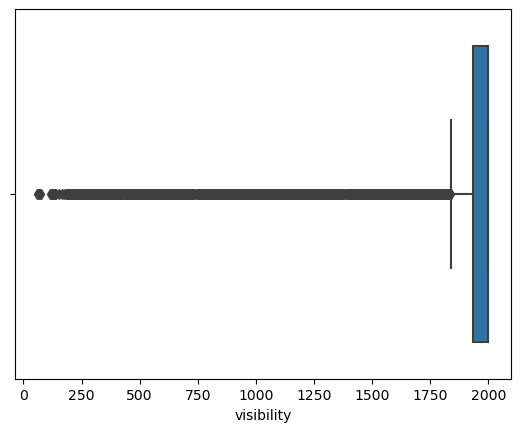

0


In [51]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
sns.boxplot(x = 'visibility', data = data)
plt.show()

print(data['visibility'].isna().sum())

#### visibility : 결측치 없음, 하지만 박스플롯으로 확인 결과 이상치로 보이는 값들이 다수 발견

4. 변수의 기초 통계량 확인

In [60]:
#변수의 기초 통계량을 확인해보세요
print(data['visibility'].describe())
print("1사분위수 보다 작은 값들 카운트 : ", 
      data.loc[data['visibility'] < data['visibility'].quantile(.25), 'visibility'].count() )

count    5827.000000
mean     1758.438648
std       490.969394
min        60.000000
25%      1935.500000
50%      2000.000000
75%      2000.000000
max      2000.000000
Name: visibility, dtype: float64
1사분위수 보다 작은 값들 카운트 :  1457


5. 변수의 분포 확인

In [63]:
#변수의 분포를 확인해보세요.
data['visibility'].value_counts()

2000    4218
1996       8
1984       7
1992       7
1997       6
        ... 
1756       1
313        1
848        1
1406       1
1250       1
Name: visibility, Length: 1032, dtype: int64

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

박스플롯의 결과 20km의 가시 거리 제외 다른 값들의 분포를 확인 결과 갯수가 매우 적어 이를 적절히 처리해야할 것 같음

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature7 : ozone

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

오존 수치

2. 변수가 수치형인지 범주형인지


In [64]:
#변수의 자료형을 확인해보세요.
data['ozone'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: ozone
Non-Null Count  Dtype  
--------------  -----  
5699 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


##  ozone : 실수

3. 변수의 결측치 존재 여부 및 조치방안

In [65]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['ozone'].isna().sum()

128

## ozone : 결측치 존재 -> 평균값으로 대체

In [165]:
display(data.loc[data['ozone'].isna()])
data['ozone'].loc[data['ozone'].isna()] = data['ozone'].mean()

data['ozone'].isna().sum()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
274,2021-04-12,11,NaN,NaN,NaN,16.9,0,2.8,41,2000,117
275,2021-04-12,12,NaN,NaN,NaN,17.6,0,3.9,39,2000,73
538,2021-04-23,11,NaN,NaN,NaN,20.5,0,4.4,42,2000,261
539,2021-04-23,12,NaN,NaN,NaN,20.6,0,4.4,32,2000,258
540,2021-04-23,13,NaN,NaN,NaN,20.6,0,4.0,33,2000,236
...,...,...,...,...,...,...,...,...,...,...,...
5648,2021-11-22,14,22.0,7.0,NaN,3.0,0,6.2,63,2000,143
5649,2021-11-22,15,16.0,NaN,NaN,3.0,0,6.1,56,2000,157
5650,2021-11-22,16,49.0,23.0,NaN,3.2,0,6.1,52,2000,155
5651,2021-11-22,17,43.0,19.0,NaN,2.1,0,4.6,56,2000,277


C:\Users\User\AppData\Local\Temp\ipykernel_14404\3728973498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ozone'].loc[data['ozone'].isna()] = data['ozone'].mean()


0

4. 변수의 기초 통계량 확인

count    5827.000000
mean        0.031811
std         0.018075
min         0.001000
25%         0.020000
50%         0.031000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64


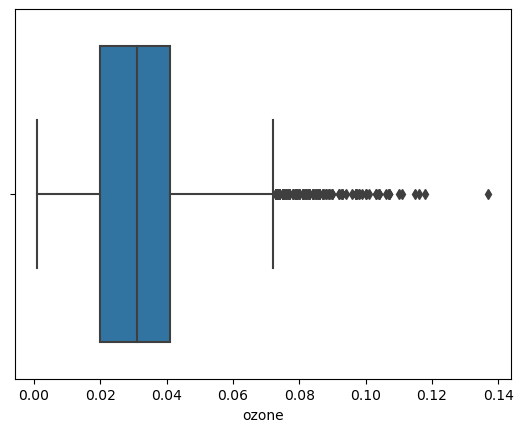

In [167]:
#변수의 기초 통계량을 확인해보세요
print(data['ozone'].describe())
sns.boxplot(x = 'ozone', data = data)
plt.show()

5. 변수의 분포 확인

In [77]:
#변수의 분포를 확인해보세요.
print(data['ozone'].unique())

[0.002 0.003 0.023 0.028 0.008 0.009 0.018 0.027 0.032 0.033 0.038 0.042
 0.044 0.045 0.043 0.039 0.037 0.036 0.034 0.04  0.035 0.041 0.025 0.01
 0.015 0.006 0.022 0.019 0.03  0.026 0.021 0.017 0.031 0.029 0.024 0.02
 0.016 0.004 0.049 0.053 0.055 0.059 0.06  0.051 0.046 0.012 0.013 0.014
 0.047 0.05  0.058 0.052 0.007 0.056   nan 0.066 0.057 0.011 0.054 0.065
 0.067 0.07  0.077 0.072 0.005 0.064 0.068 0.071 0.061 0.074 0.069 0.048
 0.063 0.079 0.106 0.104 0.085 0.075 0.081 0.073 0.08  0.062 0.078 0.088
 0.107 0.11  0.116 0.087 0.082 0.097 0.099 0.094 0.086 0.083 0.09  0.093
 0.084 0.076 0.089 0.1   0.137 0.115 0.092 0.098 0.103 0.096 0.111 0.118
 0.101 0.001]


6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

결측치가 존재하여 오존의 평균값으로 대체했음

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature8 : PM10

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

미세먼지 수치

2. 변수가 수치형인지 범주형인지


In [81]:
#변수의 자료형을 확인해보세요.
data['PM10'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: PM10
Non-Null Count  Dtype  
--------------  -----  
5805 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


## PM10 : 실수

3. 변수의 결측치 존재 여부 및 조치방안

In [82]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['PM10'].isna().sum()

22

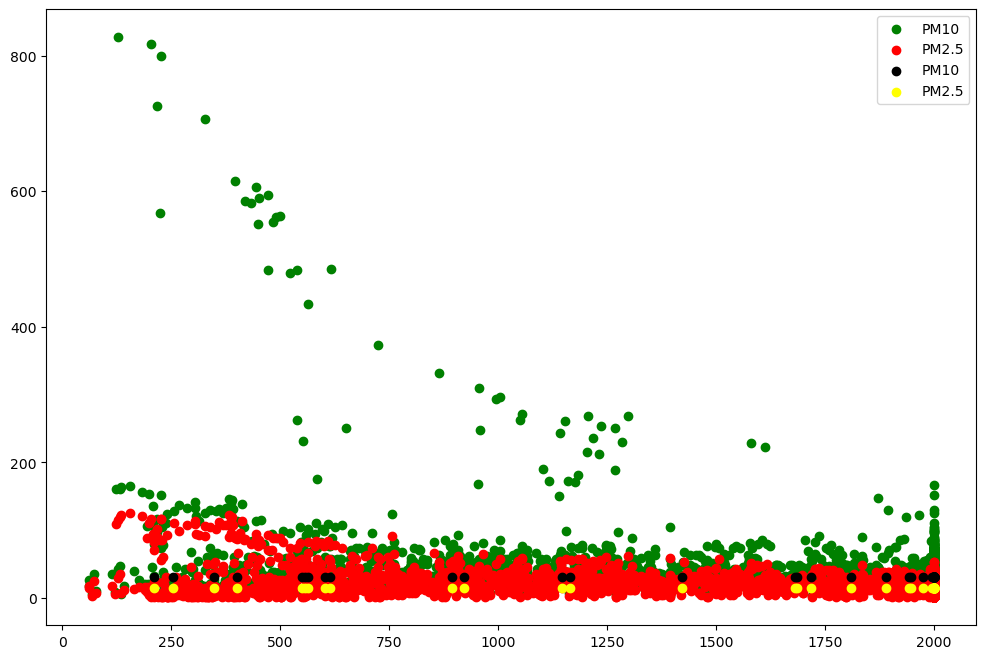

In [168]:
data_not_na = data.loc[(data['PM10'].isna() == False) & (data['PM2.5'].isna() == False)]
data_na = data.loc[(data['PM10'].isna()) | data['PM2.5'].isna()]
data_na_copy = data_na.copy()

# 평균값으로 대체해보고 그래프를 보자 !
PM_10_mean = data_not_na['PM10'].mean()
PM_2_5_mean = data_not_na['PM2.5'].mean()
data_na_copy['PM10'] = int(PM_10_mean)
data_na_copy['PM2.5'] = int(PM_2_5_mean)


plt.figure(figsize = (12,8))
plt.scatter('visibility', 'PM10', data = data_not_na, color = 'green')
plt.scatter('visibility', 'PM2.5', data = data_not_na, color = 'red')
plt.scatter('visibility', 'PM10', data = data_na_copy, color = 'black')
plt.scatter('visibility', 'PM2.5', data = data_na_copy, color = 'yellow')

plt.legend()
plt.show()

### 결측치 평균값으로 대체 !

In [169]:
data['PM10'].loc[data['PM10'].isna()] = data_not_na['PM10'].mean()
data['PM2.5'].loc[data['PM2.5'].isna()] = data_not_na['PM2.5'].mean()

print(data['PM10'].isna().sum() , data['PM2.5'].isna().sum())

0 0


C:\Users\User\AppData\Local\Temp\ipykernel_14404\4007756181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PM10'].loc[data['PM10'].isna()] = data_not_na['PM10'].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_14404\4007756181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PM2.5'].loc[data['PM2.5'].isna()] = data_not_na['PM2.5'].mean()


4. 변수의 기초 통계량 확인

In [104]:
#변수의 기초 통계량을 확인해보세요
data['PM10'].describe()

count    5827.000000
mean       30.892486
std        42.484784
min         0.031811
25%        16.000000
50%        24.000000
75%        36.000000
max       827.000000
Name: PM10, dtype: float64

5. 변수의 분포 확인

18.0     181
22.0     179
20.0     177
16.0     174
23.0     173
        ... 
296.0      1
373.0      1
433.0      1
479.0      1
332.0      1
Name: PM10, Length: 190, dtype: int64


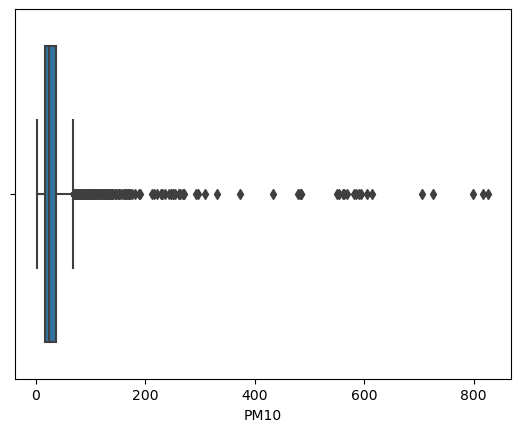

In [170]:
#변수의 분포를 확인해보세요.
print(data['PM10'].value_counts())
sns.boxplot(x = 'PM10', data = data)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

결측치가 존재하여 평균값으로 대체

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature9 : PM2.5

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

초미세먼지 수치

2. 변수가 수치형인지 범주형인지


In [106]:
#변수의 자료형을 확인해보세요.
data['PM2.5'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: PM2.5
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


## PM2.5 : 실수 

3. 변수의 결측치 존재 여부 및 조치방안

In [107]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['PM2.5'].isna().sum()

0

## PM2.5 결측치 PM10 결측치 처리할때 같이 처리

4. 변수의 기초 통계량 확인

In [110]:
#변수의 기초 통계량을 확인해보세요
data['PM2.5'].describe()

count    5827.000000
mean       14.992963
std        12.887194
min         0.031811
25%         7.000000
50%        12.000000
75%        20.000000
max       125.000000
Name: PM2.5, dtype: float64

5. 변수의 분포 확인

5.0      265
7.0      262
11.0     259
12.0     256
13.0     255
        ... 
71.0       1
102.0      1
115.0      1
117.0      1
82.0       1
Name: PM2.5, Length: 111, dtype: int64


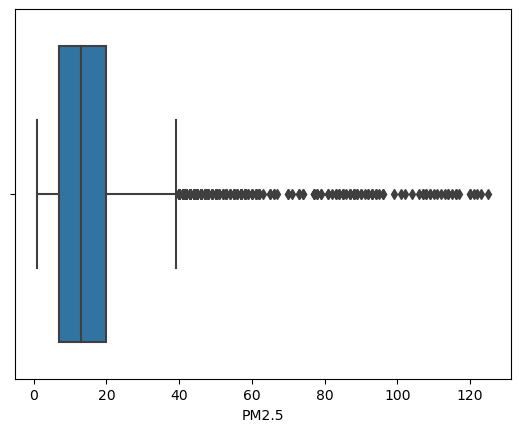

In [171]:
#변수의 분포를 확인해보세요.
print(data['PM2.5'].value_counts())

sns.boxplot(x ='PM2.5', data = data)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Count (Target)

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

시간에 따른 따릉이 대여 수

2. 변수가 수치형인지 범주형인지


In [112]:
#변수의 자료형을 확인해보세요.
data['count'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: count
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


## count : 실수

3. 변수의 결측치 존재 여부 및 조치방안

In [113]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['count'].isna().sum()

0

## count : 결측치 없음

4. 변수의 기초 통계량 확인

In [114]:
#변수의 기초 통계량을 확인해보세요
data['count'].describe()

count    5827.000000
mean      211.151377
std       187.644960
min         0.031811
25%        46.000000
50%       181.000000
75%       314.000000
max      1746.000000
Name: count, dtype: float64

5. 변수의 분포 확인

0.031811      128
20.000000      45
24.000000      44
16.000000      44
25.000000      43
             ... 
714.000000      1
717.000000      1
641.000000      1
775.000000      1
519.000000      1
Name: count, Length: 758, dtype: int64


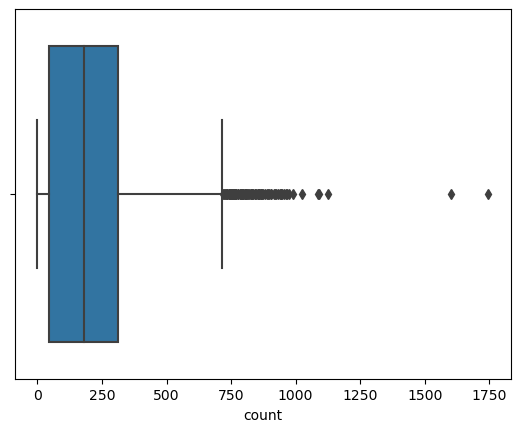

In [116]:
#변수의 분포를 확인해보세요.
print(data['count'].value_counts())

sns.boxplot(x = 'count', data = data)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

박스플롯 오른쪽 펜스에 유독 눈에 높은 값들 발견 이상치로 판단해야 하나 ?

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### [Step4] 이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)을 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [251]:
target = 'count'
data_copy = data.copy()

#### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

1. 강수 여부와 따릉이 대여량간 이변량 분석

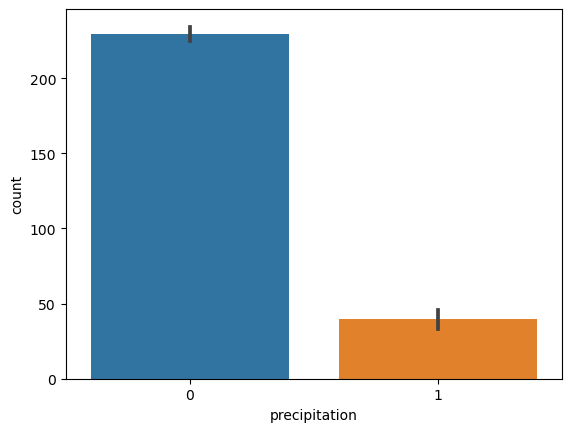

강우여부와 대여수 상관분석 :  PearsonRResult(statistic=-0.26985853775618945, pvalue=8.862391840558463e-98)
강우여부의 t-통계량:  Ttest_indResult(statistic=21.389614151911022, pvalue=8.86239184041254e-98)


In [183]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

# 시각화
sns.barplot(x = 'precipitation', y = target, data = data_copy)
plt.show()

print("강우여부와 대여수 상관분석 : ",spst.pearsonr(data_copy['precipitation'] , data_copy[target]))

no_rain = data_copy.loc[data_copy['precipitation']==0, target]
rain = data_copy.loc[data_copy['precipitation']==1, target]

print("강우여부의 t-통계량: ",spst.ttest_ind(no_rain , rain))

t-통계량 > 2 보다 크므로 두 범주간 차이가 크다 / 또한 대여수와 약한 관계에 있다(귀무가설 기각)

#### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

2. 시간대별 데이터와 따릉이 대여량간 분석

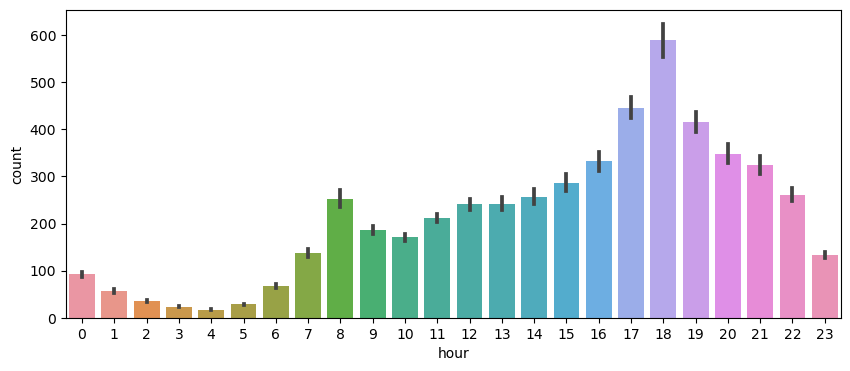

시간 / 대여량 상관분석 :  PearsonRResult(statistic=0.5864350283919393, pvalue=0.0)


In [283]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

plt.figure(figsize = (10,4))
sns.barplot(x = 'hour',y = target, data = data_copy)
plt.show()

print('시간 / 대여량 상관분석 : ',spst.pearsonr(data_copy['hour'] , data_copy[target]))

3. 온도 데이터와 따릉이 대여량간 분석

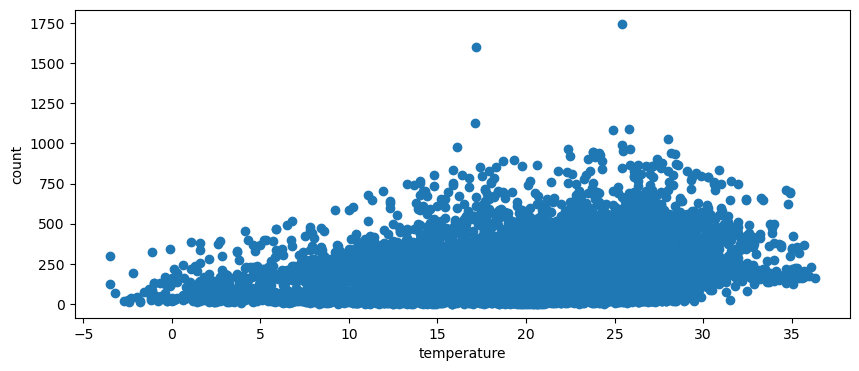

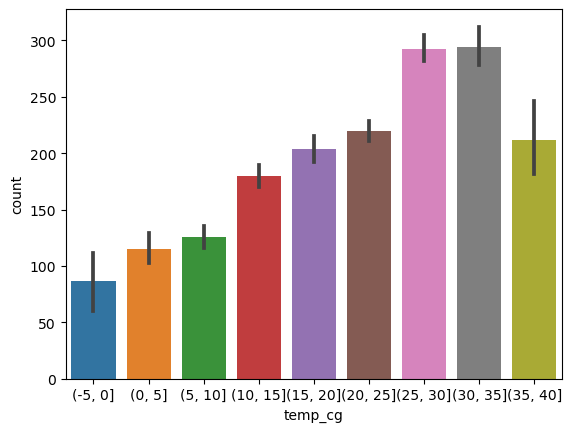

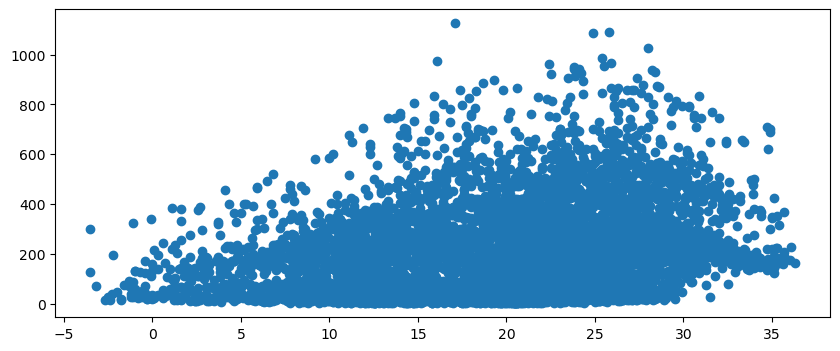

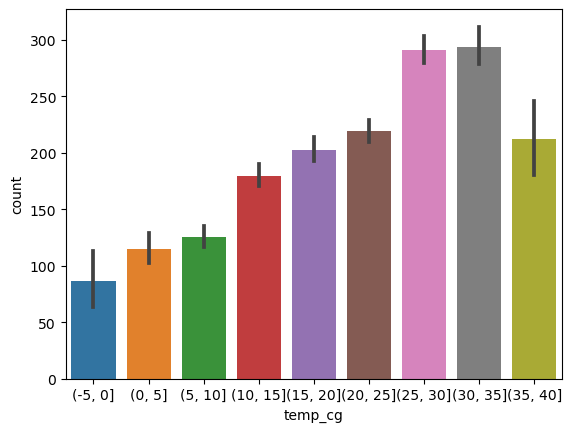

온도 / 대여량 상관분석 :  PearsonRResult(statistic=0.2771692363089791, pvalue=2.9405165551619465e-103)


In [284]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
plt.figure(figsize = (10,4))
plt.scatter('temperature',target, data = data_copy)
plt.xlabel('temperature')
plt.ylabel('count')
plt.show()

data_copy['temp_cg'] = pd.cut(data_copy['temperature'], [-5,0,5,10,15,20,25,30,35,40])
sns.barplot(x = 'temp_cg', y= target, data = data_copy)
plt.show()

data_temp = data_copy.copy()
data_temp.drop(data_temp.loc[data_temp[target] > 1500].index ,axis = 0, inplace = True)

plt.figure(figsize = (10,4))
plt.scatter('temperature',target, data = data_temp)
plt.show()


data_temp['temp_cg'] = pd.cut(data_temp['temperature'], [-5,0,5,10,15,20,25,30,35,40])
sns.barplot(x = 'temp_cg', y= target, data = data_temp)
plt.show()

print('온도 / 대여량 상관분석 : ',spst.pearsonr(data_copy['temperature'] , data_copy[target]))

4. 풍속 데이터와 따릉이 대여량간 분석

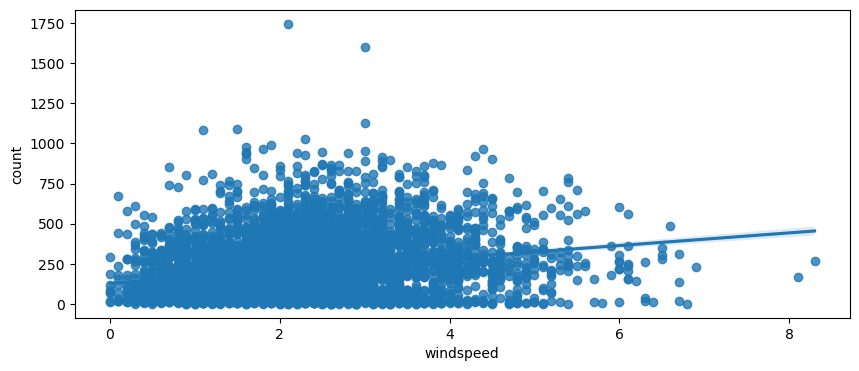

풍속 / 대여량 상관분석 :  PearsonRResult(statistic=0.22372189900674888, pvalue=5.2433176782994606e-67)


In [292]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
plt.figure(figsize = (10,4))
sns.regplot(x ='windspeed',y =target, data = data_copy)
plt.show()

print('풍속 / 대여량 상관분석 : ',spst.pearsonr(data_copy['windspeed'] , data_copy[target]))

5. 습도 데이터와 따릉이 대여량간 분석

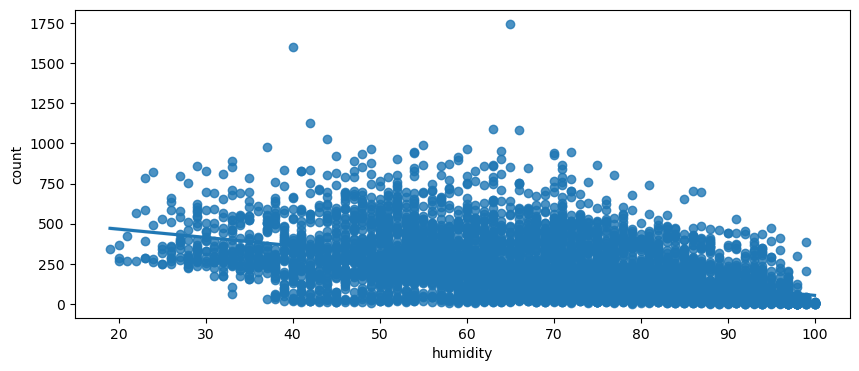

습도 / 대여량 상관분석 :  PearsonRResult(statistic=-0.4789554265904137, pvalue=0.0)


In [233]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
plt.figure(figsize = (10,4))
sns.regplot(x ='humidity',y = target, data = data_copy)
plt.show()

print('습도 / 대여량 상관분석 : ',spst.pearsonr(data_copy['humidity'] , data_copy[target]))

6. 시정 데이터와 따릉이 대여량간 분석

시정 / 대여량 상관분석 :  PearsonRResult(statistic=0.26582778327488765, pvalue=7.876003852900128e-95)


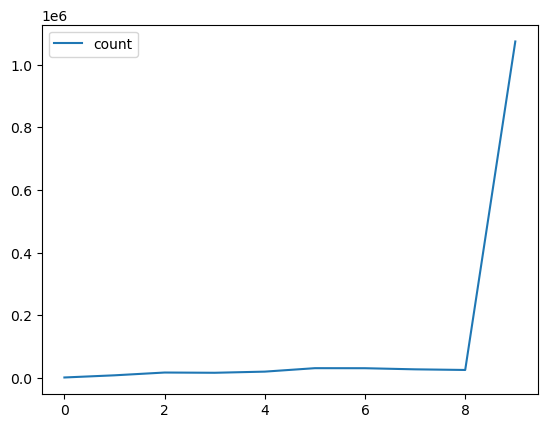

In [281]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

data_copy['vb_cg'] = pd.cut(data_copy['visibility'], [0,200,400,600,800,1000,1200,1400,1600,1800,2000])
data_copy.groupby(by = 'vb_cg', as_index = False)[target].sum().plot()

# plt.bar(temp['vb_cg'].index.astype('str'), temp[target])
# plt.xlabel('visibility(per 200m)')
# plt.ylabel('count')
# plt.show()

print('시정 / 대여량 상관분석 : ',spst.pearsonr(data_copy['visibility'] , data_copy[target]))

7. 오존 데이터와 따릉이 대여량간 분석

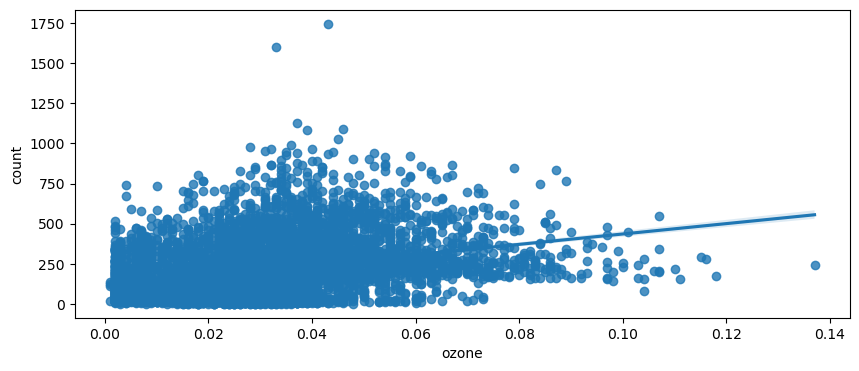

오존 / 대여량 상관분석 :  PearsonRResult(statistic=0.3143572310359726, pvalue=8.11221301182502e-134)


In [269]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
plt.figure(figsize = (10,4))
sns.regplot(x ='ozone',y =target, data = data_copy)
plt.show()

print('오존 / 대여량 상관분석 : ',spst.pearsonr(data_copy['ozone'] , data_copy[target]))

8. 미세먼지 농도 데이터와 따릉이 대여량간 분석

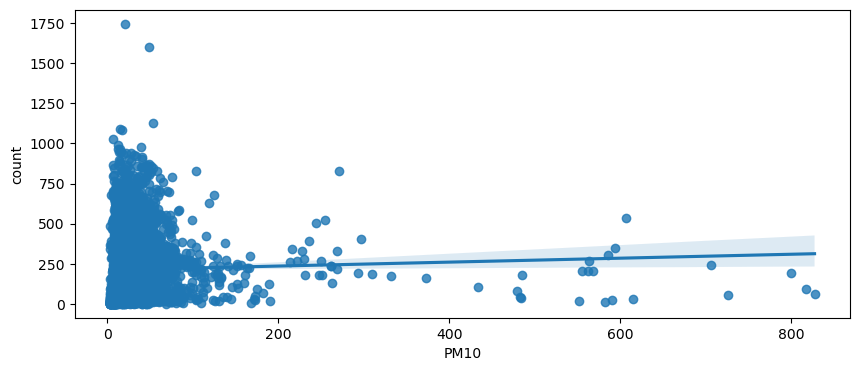

미세먼지 / 대여량 상관분석 :  PearsonRResult(statistic=0.02811639788268875, pvalue=0.031855182814071806)


In [273]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
plt.figure(figsize = (10,4))
sns.regplot(x ='PM10',y =target, data = data_copy)
plt.show()

print('미세먼지 / 대여량 상관분석 : ',spst.pearsonr(data_copy['PM10'] , data_copy[target]))

9. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

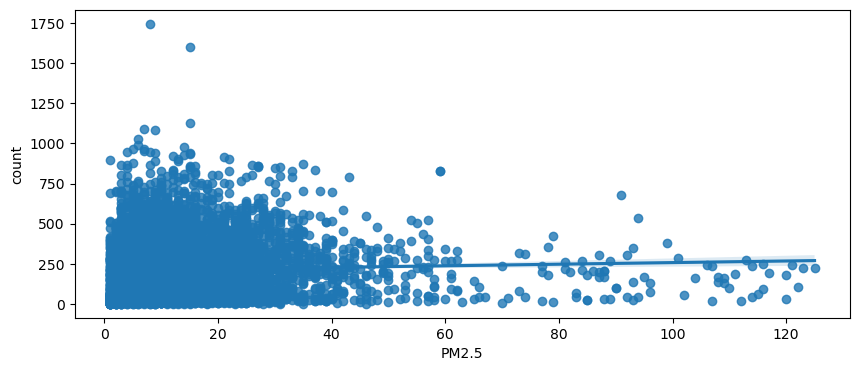

초미세먼지 / 대여량 상관분석 :  PearsonRResult(statistic=0.03696080947041095, pvalue=0.004776174102447628)


In [274]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
plt.figure(figsize = (10,4))
sns.regplot(x ='PM2.5',y =target, data = data_copy)
plt.show()

print('초미세먼지 / 대여량 상관분석 : ',spst.pearsonr(data_copy['PM2.5'] , data_copy[target]))

### [Step5] 가설 검정

#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

시간, 습도, 강수여부

#### <font color='green'>2. 약한 관계의 변수</font>


온도, 풍속, 시정, 오존, 강수여부, 초미세먼지 ,미세먼지

#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


### [Step6] Insight 도출